# * Importing important **libraries** 

In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# * Reading data

In [2]:
train_df = pd.read_csv("/kaggle/input/iitgaitab102022/Week5_train.csv")

In [3]:
test_df = pd.read_csv("/kaggle/input/iitgaitab102022/Week5_test.csv")

# Analysing given dataset

In [4]:
print(test_df.shape)
print(train_df.shape)

(13840, 15)
(13842, 16)


In [5]:
train_df.head(10)

,id,Age,Working_class,fnlwgt,education,education_num,marital_status,Occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,earning
0,0,37,Private,280966,Bachelors,13,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,0
1,1,41,Private,205153,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,2,23,Private,237720,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,38,United-States,1
3,3,35,Private,276153,Bachelors,13,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Female,4650,0,40,United-States,1
4,4,28,Private,216178,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,1
5,5,40,Private,238329,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,45,United-States,1
6,6,27,Private,275110,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,80,United-States,0
7,7,46,Local-gov,301124,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,1564,45,United-States,0
8,8,24,Private,195808,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,1
9,9,38,?,203482,7th-8th,4,Married-civ-spouse,?,Husband,White,Male,0,0,45,United-States,1


In [6]:
train_df.columns

Index(['id', 'Age', 'Working_class', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'Occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'earning'],
      dtype='object')

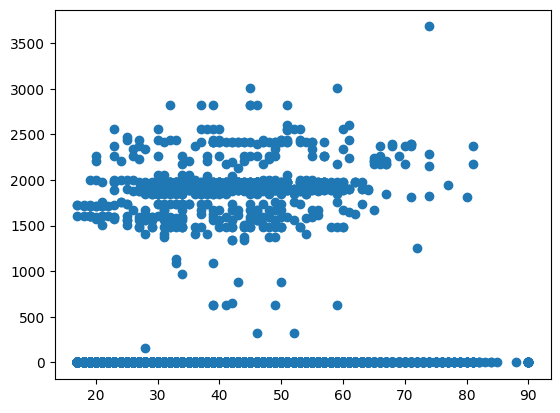

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(train_df.Age,train_df.capital_loss)

# Preparing Data 

In [8]:
y=train_df.earning
id=test_df.id
train=train_df.drop(['earning','id','fnlwgt'],axis='columns')
test=test_df.drop(['id','fnlwgt'],axis='columns')
data=pd.concat([train,test],axis=0)

*Checking for NAN*

In [9]:
nan_cols = [i for i in data.columns if data[i].isnull().any()]
nan_cols

[]

*Removing " ?" *

In [10]:
datas = data.replace(' ?',value=np.NaN)
#datas['Working_class'] = datas['Working_class'].apply(lambda x: np.NaN if x == ' ?' else x)
#datas['Working_class'] = datas['Working_class'].apply(lambda x: np.NaN if x == ' ?' else x)

*Filling* **NAN** *with suitable data *

In [11]:
nan_cols = [i for i in datas.columns if datas[i].isnull().any()]
nan_cols

['Working_class', 'Occupation', 'native_country']

In [12]:
datas['capital_gain'].value_counts()

0        24524
15024      513
7688       410
7298       364
99999      244
         ...  
22040        1
1455         1
1639         1
3456         1
7262         1
Name: capital_gain, Length: 118, dtype: int64

In [13]:
#datas['fnlwgt'].nunique()

In [14]:
datas.head(7)

,Age,Working_class,education,education_num,marital_status,Occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country
0,37,Private,Bachelors,13,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States
1,41,Private,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
2,23,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,38,United-States
3,35,Private,Bachelors,13,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Female,4650,0,40,United-States
4,28,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States
5,40,Private,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,45,United-States
6,27,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,80,United-States


In [15]:
datas=datas.fillna({
       'Working_class':'Private',
        'Occupation':'Prof-specialty',
     'native_country':'United-States'
})

In [16]:
nan_cols = [i for i in datas.columns if datas[i].isnull().any()]
nan_cols

[]

In [17]:
# from mlxtend.preprocessing import minmax_scaling
# datas = minmax_scaling(datas,columns=[0])

# Preparing Dataframe to train the model

In [18]:
dataset = pd.get_dummies(datas, drop_first=True)

In [19]:
X=dataset.iloc[:13842,:]
test=dataset.iloc[13842:,:]

In [20]:
#train_df.head()
X.tail()

,Age,education_num,capital_gain,capital_loss,hours_per_week,Working_class_ Local-gov,Working_class_ Private,Working_class_ Self-emp-inc,Working_class_ Self-emp-not-inc,Working_class_ State-gov,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,native_country_United-States
13837,48,9,0,0,45,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13838,37,15,0,0,60,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
13839,22,10,0,0,30,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13840,43,13,0,0,60,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
13841,47,9,0,1504,35,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
y.tail()

13837    1
13838    0
13839    1
13840    0
13841    1
Name: earning, dtype: int64

In [22]:
datas.nunique()

Age                71
Working_class       8
education          16
education_num      16
marital_status      7
Occupation         15
relationship        6
race                5
gender              2
capital_gain      118
capital_loss       89
hours_per_week     95
native_country     41
dtype: int64

### Performing the Train Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [24]:
print(y_train.value_counts())


1    7196
0    5261
Name: earning, dtype: int64


In [25]:
y_test.value_counts()

1    803
0    582
Name: earning, dtype: int64

# Training

In [26]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5)
from sklearn.model_selection import cross_val_score

**LogisticRegression**

In [27]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
lr.score(X_test,y_test)

0.8036101083032491

In [29]:
cross_val_score(lr,X,y)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.7843987 , 0.79523294, 0.7933526 , 0.79660405, 0.78143064])

**MultinomialNB**

In [30]:
from sklearn.naive_bayes import MultinomialNB
mo=MultinomialNB()
mo.fit(X_train, y_train)
mo.score(X_test,y_test)

0.6375451263537906

In [31]:
cross_val_score(mo,X,y)

array([0.63921993, 0.63813651, 0.65209538, 0.65137283, 0.6416185 ])

In [32]:
X.head()

,Age,education_num,capital_gain,capital_loss,hours_per_week,Working_class_ Local-gov,Working_class_ Private,Working_class_ Self-emp-inc,Working_class_ Self-emp-not-inc,Working_class_ State-gov,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,native_country_United-States
0,37,13,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,41,11,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,23,13,0,0,38,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,35,13,4650,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


**GaussianNB**

In [33]:
from sklearn.naive_bayes import GaussianNB
mode = GaussianNB()

In [34]:
mode.fit(X_train, y_train)
mode.score(X_test,y_test)


0.7855595667870036

In [35]:
cross_val_score(mode,X,y)

array([0.78620441, 0.7843987 , 0.7882948 , 0.79515896, 0.78793353])

**SVC**

In [36]:
from sklearn.svm import SVC
model = SVC(C=20)

In [37]:
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.6794223826714801

# Using Boosting Algorithm

In [38]:
from sklearn.ensemble import GradientBoostingClassifier #For Regression
cl = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
cl.fit(X_train, y_train)
cl.score(X_test,y_test)

0.8158844765342961

In [39]:
cross_val_score(cl,X,y)

array([0.8255688 , 0.8255688 , 0.82333815, 0.83562139, 0.82767341])

In [40]:
from sklearn.ensemble import AdaBoostClassifier #For Classification
from sklearn.ensemble import AdaBoostRegressor #For Regression
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
clr = AdaBoostClassifier(n_estimators=40, base_estimator=dtree,learning_rate=1.0)
clr.fit(X_train, y_train)
clr.score(X_test,y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.7790613718411552

In [41]:
#cross_val_score(model,X,y)

In [42]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

In [43]:
# find out the indices of categorical variables
categorical_var = np.where(X_train.dtypes != np.float)[0]

/tmp/ipykernel_20/3792431531.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_var = np.where(X_train.dtypes != np.float)[0]


In [44]:
model = CatBoostClassifier(iterations=50)
model.fit(X_train, y_train,cat_features = categorical_var,plot=False)

Learning rate set to 0.471759
0:	learn: 0.5247179	total: 83.6ms	remaining: 4.1s
1:	learn: 0.4298138	total: 98.1ms	remaining: 2.35s
2:	learn: 0.3948699	total: 111ms	remaining: 1.74s
3:	learn: 0.3753686	total: 123ms	remaining: 1.42s
4:	learn: 0.3634914	total: 136ms	remaining: 1.23s
5:	learn: 0.3555254	total: 149ms	remaining: 1.09s
6:	learn: 0.3521518	total: 161ms	remaining: 992ms
7:	learn: 0.3490057	total: 174ms	remaining: 912ms
8:	learn: 0.3473545	total: 186ms	remaining: 847ms
9:	learn: 0.3452291	total: 200ms	remaining: 799ms
10:	learn: 0.3437776	total: 212ms	remaining: 750ms
11:	learn: 0.3434295	total: 218ms	remaining: 691ms
12:	learn: 0.3411228	total: 236ms	remaining: 672ms
13:	learn: 0.3390147	total: 254ms	remaining: 652ms
14:	learn: 0.3376911	total: 266ms	remaining: 622ms
15:	learn: 0.3361243	total: 282ms	remaining: 600ms
16:	learn: 0.3356186	total: 300ms	remaining: 581ms
17:	learn: 0.3345698	total: 319ms	remaining: 567ms
18:	learn: 0.3338670	total: 341ms	remaining: 557ms
19:	learn:

In [45]:
model.score(X_test,y_test)

0.8187725631768953

In [46]:
cross_val_score(model,X,y)

Learning rate set to 0.448621
0:	learn: 0.4837699	total: 5.42ms	remaining: 266ms
1:	learn: 0.4216856	total: 10.5ms	remaining: 252ms
2:	learn: 0.3976027	total: 15.4ms	remaining: 242ms
3:	learn: 0.3842123	total: 20.6ms	remaining: 237ms
4:	learn: 0.3791422	total: 25.4ms	remaining: 228ms
5:	learn: 0.3710500	total: 30.5ms	remaining: 223ms
6:	learn: 0.3654724	total: 35.1ms	remaining: 216ms
7:	learn: 0.3609492	total: 40ms	remaining: 210ms
8:	learn: 0.3585352	total: 44.7ms	remaining: 204ms
9:	learn: 0.3565910	total: 49.2ms	remaining: 197ms
10:	learn: 0.3543705	total: 54ms	remaining: 191ms
11:	learn: 0.3521561	total: 58.7ms	remaining: 186ms
12:	learn: 0.3503888	total: 63.6ms	remaining: 181ms
13:	learn: 0.3492055	total: 69.4ms	remaining: 178ms
14:	learn: 0.3484245	total: 74.2ms	remaining: 173ms
15:	learn: 0.3469861	total: 79.2ms	remaining: 168ms
16:	learn: 0.3459649	total: 84ms	remaining: 163ms
17:	learn: 0.3446505	total: 88.8ms	remaining: 158ms
18:	learn: 0.3377138	total: 93.3ms	remaining: 152m

array([0.8255688 , 0.82412423, 0.82117052, 0.83706647, 0.83489884])

## Submission File

In [47]:
predicted=model.predict(test)

In [48]:

prediction = pd.DataFrame(predicted,columns=['earning']).to_csv('submissio.csv',index=False)
result=pd.read_csv('submissio.csv')
result=pd.concat([id,result],axis='columns')
result.tail()


,id,earning
13835,13835,1
13836,13836,1
13837,13837,1
13838,13838,0
13839,13839,1


In [49]:
prediction = pd.DataFrame(result, columns=['id','earning']).to_csv('submission.csv',index=False)
results=pd.read_csv('submission.csv')
results.head(20)

,id,earning
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1
7,7,1
8,8,1
9,9,0
